# Transform cleaned and catergorical data in numerical one

In [1]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dexplot as dxp
import tikzplotlib
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image
import numpy as np
import copy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import urllib
import requests
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_csv('./Output/CleanedCategoricalData.csv')
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,"In order to prevent flu spreading, what should you do? (Check all that applies)",Condition
0,25.0,Female,High School,No,Italy,Yes,No,I do not have children,Stay home when we have flu,I do not know,I do not know,I do not know,Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
1,26.0,Male,Bachelor degree,No,Italy,Maybe,No,I do not have children,"If sick, be responsible avoiding contact and/o...",Yes,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,I do not know,Avoid close contact with people who are sick;S...,Control
2,30.0,Female,Bachelor degree,No,USA,Yes,No,I do not have children,"Vaccine, mask, stay home when sick",Yes,Once per year,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control
3,30.0,Male,High School,No,Italy,Yes,No,I do not have children,I think that every people should wash hands,Yes,Only when flu spread particularly fast,"Yes, all people can take a flu shot",Mainly person-to-person through respiratory dr...,Because I will not infect people around me (fr...,The time from the moment of exposure to an inf...,Stay home when you are sick;Cover your mouth a...,Experimental
4,24.0,Female,High School,No,UAE,Yes,No,No,Check body status out + igiene / vaccine if ne...,Yes,I do not know,"No, some people cannot take a flu shot due to ...",Mainly person-to-person through respiratory dr...,Because I will stay healthy and not infect peo...,The time from the moment of exposure to an inf...,Avoid close contact with people who are sick;S...,Control


### Compute volunteers score (points)

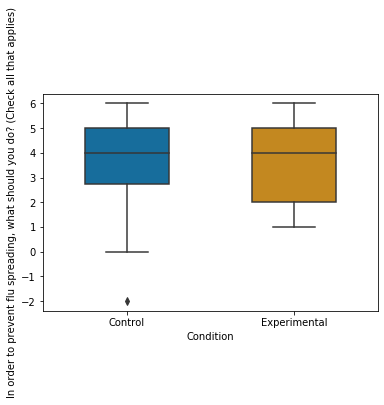

In [3]:
Plus_minus_answers = pd.DataFrame()
Correct_answers =['Avoid close contact with people who are sick', 'Stay home when you are sick', 'Cover your mouth and nose', 
                  'Avoid touching your eyes, nose, and mouth','Wash often your hands','Take the vaccine']
all_list_answers =[]
for s in Cleaned_Data['In order to prevent flu spreading, what should you do? (Check all that applies)']:
    list_answers = s.split(';')
    points= 0
    for i in range(len(list_answers)):
        if list_answers[i] in Correct_answers:
            points+=1
        else:
            points-=1
    all_list_answers.append(points)
j=0
for s in Cleaned_Data['Condition']:
    Plus_minus_answers = Plus_minus_answers.append(pd.DataFrame({'In order to prevent flu spreading, what should you do? (Check all that applies)':[all_list_answers[j]],'Condition':[s]}),ignore_index=True, verify_integrity=False, sort=None)
    j+=1

Cleaned_Data['Points multiple choice'] = Plus_minus_answers[Plus_minus_answers.columns[0]]
Cleaned_Data.drop(['In order to prevent flu spreading, what should you do? (Check all that applies)'], axis=1, inplace=True)

sns.boxplot(y=Plus_minus_answers.columns[0], x=Plus_minus_answers.columns[1], 
                 data=Plus_minus_answers, 
                 width=0.5,                 palette="colorblind")

In [4]:
Cleaned_Data['Points'] = 0
Cleaned_Data['PointsQ1Q2Q3'] = 0
Cleaned_Data['PointsQ4Q5Q6'] = 0
correct_answers = ['Yes', 'Once per year', 
                   'No, some people cannot take a flu shot due to allergy or unhealthy conditions',
                  'Mainly person-to-person through respiratory droplets produced by an infected person',
                  'Because I will stay healthy and not infect people around me (friends, children, relatives)',
                  'The time from the moment of exposure to an infectious agent until signs and symptoms of the disease appear']

Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[9]] == correct_answers[0], 'Points'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[10]] == correct_answers[1], 'Points'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[11]] == correct_answers[2], 'Points'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[12]] == correct_answers[3], 'Points'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[13]] == correct_answers[4], 'Points'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[14]] == correct_answers[5], 'Points'] += 1

Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[9]] == correct_answers[0], 'PointsQ1Q2Q3'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[10]] == correct_answers[1], 'PointsQ1Q2Q3'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[11]] == correct_answers[2], 'PointsQ1Q2Q3'] += 1

Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[12]] == correct_answers[3], 'PointsQ4Q5Q6'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[13]] == correct_answers[4], 'PointsQ4Q5Q6'] += 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[14]] == correct_answers[5], 'PointsQ4Q5Q6'] += 1

Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[9]] != correct_answers[0], Cleaned_Data.columns[9]] = 0 
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[9]] == correct_answers[0], Cleaned_Data.columns[9]] = 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[10]] != correct_answers[1], Cleaned_Data.columns[10]] = 0
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[10]] == correct_answers[1], Cleaned_Data.columns[10]] = 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[11]] != correct_answers[2], Cleaned_Data.columns[11]] = 0 
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[11]] == correct_answers[2], Cleaned_Data.columns[11]] = 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[12]] != correct_answers[3], Cleaned_Data.columns[12]] = 0
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[12]] == correct_answers[3], Cleaned_Data.columns[12]] = 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[13]] != correct_answers[4], Cleaned_Data.columns[13]] = 0 
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[13]] == correct_answers[4], Cleaned_Data.columns[13]] = 1
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[14]] != correct_answers[5], Cleaned_Data.columns[14]] = 0 
Cleaned_Data.loc[Cleaned_Data[Cleaned_Data.columns[14]] == correct_answers[5], Cleaned_Data.columns[14]] = 1 
        
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,Condition,Points multiple choice,Points,PointsQ1Q2Q3,PointsQ4Q5Q6
0,25.0,Female,High School,No,Italy,Yes,No,I do not have children,Stay home when we have flu,0,0,0,1,1,1,Control,4,3,0,3
1,26.0,Male,Bachelor degree,No,Italy,Maybe,No,I do not have children,"If sick, be responsible avoiding contact and/o...",1,1,1,1,1,0,Control,4,5,3,2
2,30.0,Female,Bachelor degree,No,USA,Yes,No,I do not have children,"Vaccine, mask, stay home when sick",1,1,1,1,1,1,Control,6,6,3,3
3,30.0,Male,High School,No,Italy,Yes,No,I do not have children,I think that every people should wash hands,1,0,0,1,0,1,Experimental,2,3,1,2
4,24.0,Female,High School,No,UAE,Yes,No,No,Check body status out + igiene / vaccine if ne...,1,0,1,1,1,1,Control,3,5,2,3


In [5]:
Cleaned_Data['Points all'] = Cleaned_Data['Points'] + Cleaned_Data['Points multiple choice']
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,...,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,Condition,Points multiple choice,Points,PointsQ1Q2Q3,PointsQ4Q5Q6,Points all
0,25.0,Female,High School,No,Italy,Yes,No,I do not have children,Stay home when we have flu,0,...,0,1,1,1,Control,4,3,0,3,7
1,26.0,Male,Bachelor degree,No,Italy,Maybe,No,I do not have children,"If sick, be responsible avoiding contact and/o...",1,...,1,1,1,0,Control,4,5,3,2,9
2,30.0,Female,Bachelor degree,No,USA,Yes,No,I do not have children,"Vaccine, mask, stay home when sick",1,...,1,1,1,1,Control,6,6,3,3,12
3,30.0,Male,High School,No,Italy,Yes,No,I do not have children,I think that every people should wash hands,1,...,0,1,0,1,Experimental,2,3,1,2,5
4,24.0,Female,High School,No,UAE,Yes,No,No,Check body status out + igiene / vaccine if ne...,1,...,1,1,1,1,Control,3,5,2,3,8


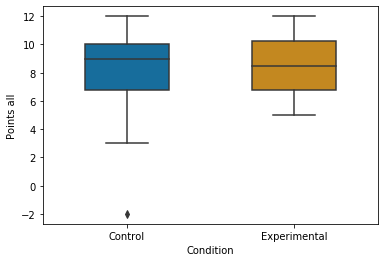

In [6]:
sns.boxplot(y='Points all', x='Condition', 
                 data=Cleaned_Data, 
                 width=0.5,
                 palette="colorblind")

### Remove data that are not analyzed numerically+substitute nan values

In [7]:
Cleaned_Data.isnull().sum()

What is your age?                                                                 1
What is your gender?                                                              0
What is your current educational level?                                           0
Are you or any of your family members scientist or health professional?           0
In what country are you currently in?                                             1
Are you interested in flu prevention?                                             0
Did you take the flu vaccine in the last 12 months?                               0
If you have children, did you vaccinate them or do you wish to vaccinate them?    2
What is, in your opinion, the best method we have to prevent flu spreading?       6
Is a vaccine necessary for a disease-free population?                             0
How many times we have to typically take a flu shot?                              0
Is the flu shot accessible to all people?                                   

In [8]:
for s in Cleaned_Data.columns:
    Cleaned_Data.loc[Cleaned_Data[s] == 'Maybe', s] = 'No'
    Cleaned_Data.loc[Cleaned_Data[s] == 'I do not have children', s] = 'No'

for s in Cleaned_Data.columns:
    Cleaned_Data.loc[Cleaned_Data[s] == 'No', s] = 0
    Cleaned_Data.loc[Cleaned_Data[s] == 'Yes', s] = 1
Cleaned_Data.loc[(Cleaned_Data['Condition'] == 'Experimental'), 'Condition'] = 1
Cleaned_Data.loc[(Cleaned_Data['Condition'] == 'Control'), 'Condition'] = 0
Cleaned_Data.loc[(Cleaned_Data[Cleaned_Data.columns[1]] == 'Male'), Cleaned_Data.columns[1]] = 1
Cleaned_Data.loc[(Cleaned_Data[Cleaned_Data.columns[1]] == 'Female'), Cleaned_Data.columns[1]] = 0
Cleaned_Data.loc[(Cleaned_Data[Cleaned_Data.columns[1]] == 'Not answered'), Cleaned_Data.columns[1]] = -1

s = 'What is your current educational level?'
Cleaned_Data.loc[Cleaned_Data[s] == 'Middle School', s] = 0
Cleaned_Data.loc[Cleaned_Data[s] == 'High School', s] = 0
Cleaned_Data.loc[Cleaned_Data[s] == 'Bachelor degree', s] = 1
Cleaned_Data.loc[Cleaned_Data[s] == 'Master degree', s] = 2
Cleaned_Data.loc[Cleaned_Data[s] == 'PhD or higher', s] = 2

Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,In what country are you currently in?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?","What is, in your opinion, the best method we have to prevent flu spreading?",Is a vaccine necessary for a disease-free population?,...,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,Condition,Points multiple choice,Points,PointsQ1Q2Q3,PointsQ4Q5Q6,Points all
0,25,0,0,0,Italy,1,0,0,Stay home when we have flu,0,...,0,1,1,1,0,4,3,0,3,7
1,26,1,1,0,Italy,0,0,0,"If sick, be responsible avoiding contact and/o...",1,...,1,1,1,0,0,4,5,3,2,9
2,30,0,1,0,USA,1,0,0,"Vaccine, mask, stay home when sick",1,...,1,1,1,1,0,6,6,3,3,12
3,30,1,0,0,Italy,1,0,0,I think that every people should wash hands,1,...,0,1,0,1,1,2,3,1,2,5
4,24,0,0,0,UAE,1,0,0,Check body status out + igiene / vaccine if ne...,1,...,1,1,1,1,0,3,5,2,3,8


In [9]:
Cleaned_Data.drop(['What is, in your opinion, the best method we have to prevent flu spreading?'], axis=1, inplace=True)
Cleaned_Data.drop(['In what country are you currently in?'], axis=1, inplace=True)
Cleaned_Data.head()

,What is your age?,What is your gender?,What is your current educational level?,Are you or any of your family members scientist or health professional?,Are you interested in flu prevention?,Did you take the flu vaccine in the last 12 months?,"If you have children, did you vaccinate them or do you wish to vaccinate them?",Is a vaccine necessary for a disease-free population?,How many times we have to typically take a flu shot?,Is the flu shot accessible to all people?,How does the flu spread?,Why is it important that you become immune from flu?,What is the incubation period?,Condition,Points multiple choice,Points,PointsQ1Q2Q3,PointsQ4Q5Q6,Points all
0,25,0,0,0,1,0,0,0,0,0,1,1,1,0,4,3,0,3,7
1,26,1,1,0,0,0,0,1,1,1,1,1,0,0,4,5,3,2,9
2,30,0,1,0,1,0,0,1,1,1,1,1,1,0,6,6,3,3,12
3,30,1,0,0,1,0,0,1,0,0,1,0,1,1,2,3,1,2,5
4,24,0,0,0,1,0,0,1,0,1,1,1,1,0,3,5,2,3,8


In [10]:
s = 'If you have children, did you vaccinate them or do you wish to vaccinate them?'
Cleaned_Data.loc[Cleaned_Data[s].isnull(), s] = 0

s = 'What is your age?'
Cleaned_Data.loc[Cleaned_Data[s].isnull(), s] = Cleaned_Data[s].mean()

In [11]:
Cleaned_Data.isnull().sum()

What is your age?                                                                 0
What is your gender?                                                              0
What is your current educational level?                                           0
Are you or any of your family members scientist or health professional?           0
Are you interested in flu prevention?                                             0
Did you take the flu vaccine in the last 12 months?                               0
If you have children, did you vaccinate them or do you wish to vaccinate them?    0
Is a vaccine necessary for a disease-free population?                             0
How many times we have to typically take a flu shot?                              0
Is the flu shot accessible to all people?                                         0
How does the flu spread?                                                          0
Why is it important that you become immune from flu?                        

### Write the cleaned and numerical data

In [12]:
Cleaned_Data.to_csv('./Output/CleanedNumericalData.csv', index=False,)